In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [3]:
df=pd.read_csv("sales_data_with_discounts.csv")
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [5]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [6]:
df.value_counts("Day").sum

<bound method Series.sum of Day
Thursday     90
Friday       60
Monday       60
Saturday     60
Sunday       60
Tuesday      60
Wednesday    60
Name: count, dtype: int64>

In [7]:
df.value_counts("Brand")

Brand
Jeera      90
Gear       60
Viva       60
Babaji     45
RealU      45
Vedic      45
YouM       45
Orange     30
Sumsang    30
Name: count, dtype: int64

In [8]:
df.isnull().sum()

Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64

In [9]:
df.isna().sum()

Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64

In [10]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [11]:
mean_value  = df[['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']].mean()
mean_value

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

In [12]:
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
print(numerical_columns)

['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']


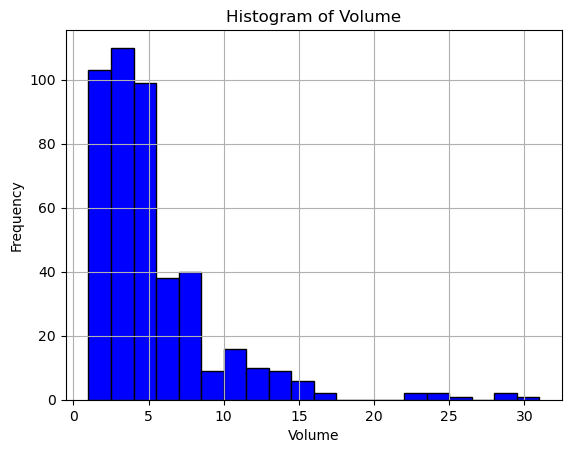

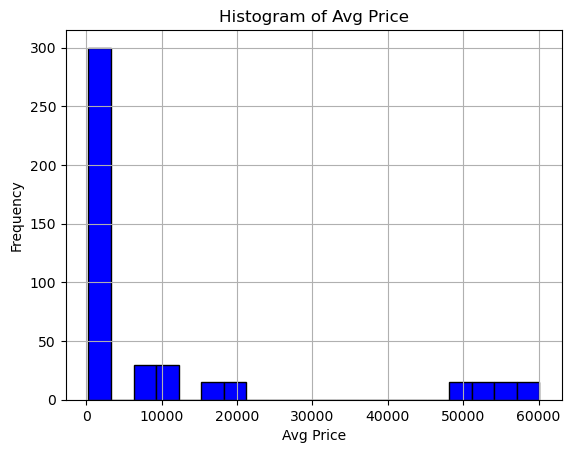

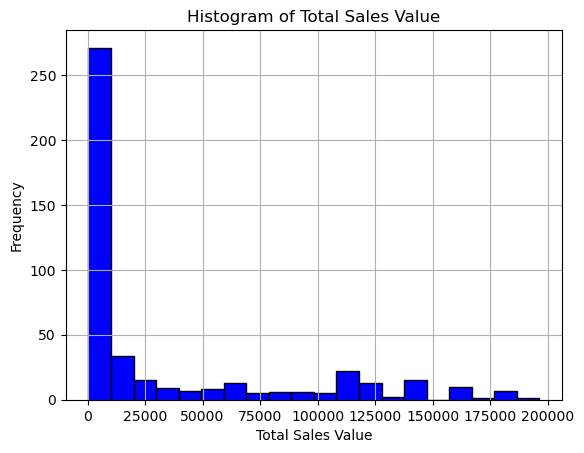

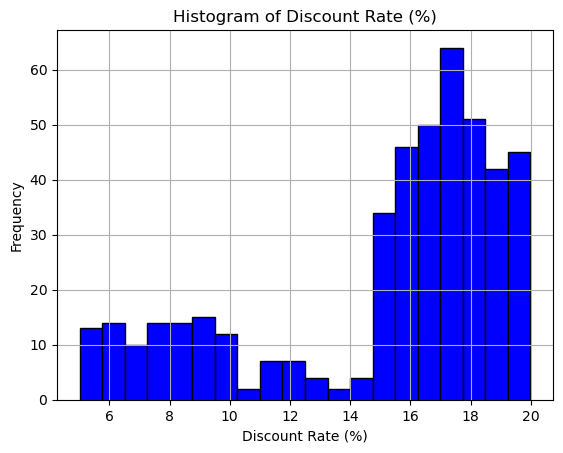

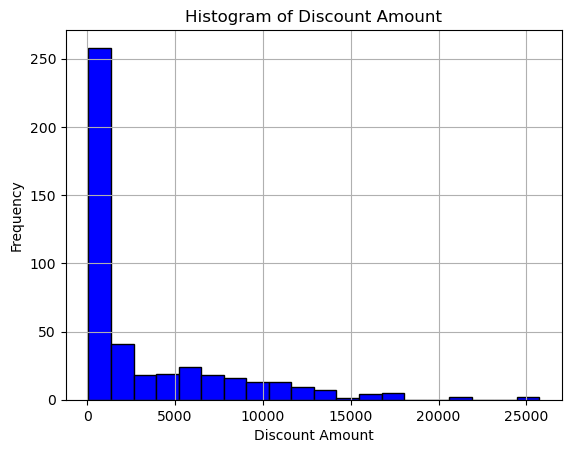

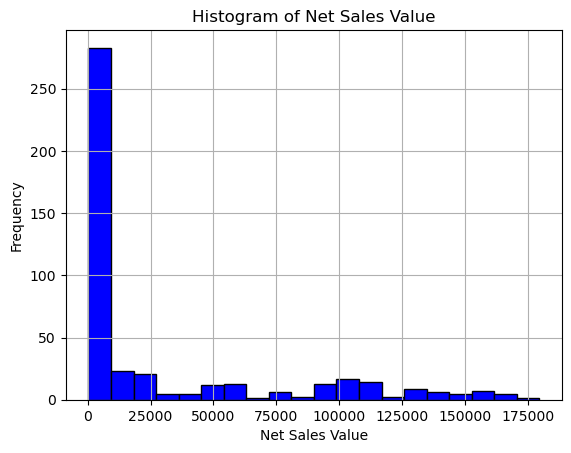

In [13]:
#Data Visualization #Histogram
for column in numerical_columns:
    plt.hist(df[column], bins=20, color='blue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.grid(True)
    plt.show()

In [14]:
#Understanding of Numerical Data from the Histograms
#Most of the numerical data is right-skewed, except the discount column, which is left-skewed.

#In all numerical columns except discount, the mean is higher than the median, indicating right skewness. For the discount column, the mean is less than the median, showing left skewness.

#Gaps in the data are observed — certain intervals have no data points, indicating missing or unevenly distributed data in those ranges.

#All graphs show signs of a bimodal distribution, which suggests two dominant value ranges in each variable.

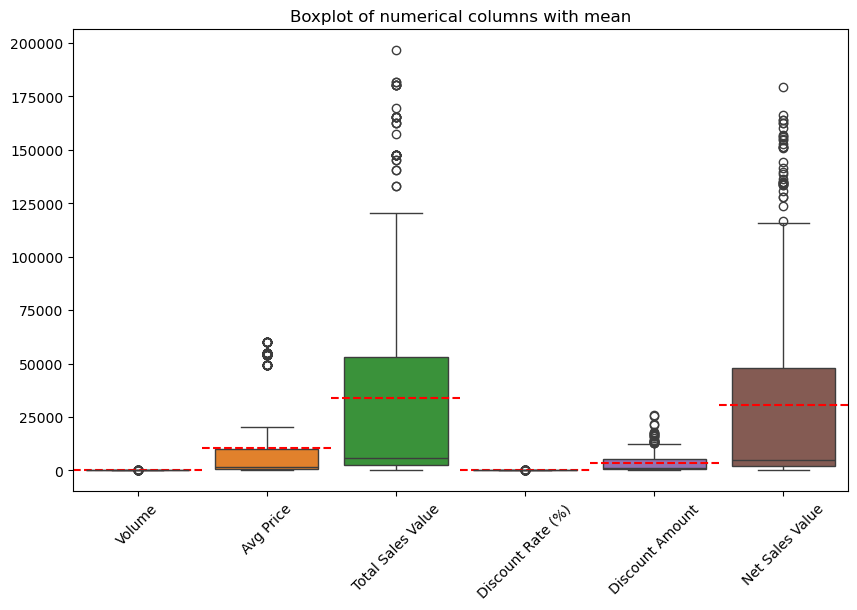

In [15]:
#Create Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of numerical columns with mean')
plt.xticks(rotation=45)

#add mean vlaues as lines to box plot
for i, mean in enumerate(mean_value):
    plt.axhline(y=mean, color='red', linestyle='--', xmin=i/len(mean_value), xmax=(i+1)/len(mean_value))

plt.show()

In [16]:
#calculate and print IQR values for each numerical column
for column in df.select_dtypes(include='number').columns:
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    print(f"IQR for {column}: {iqr:.2f}")


IQR for Volume: 3.00
IQR for Avg Price: 9635.00
IQR for Total Sales Value: 50500.00
IQR for Discount Rate (%): 4.15
IQR for Discount Amount: 4856.04
IQR for Net Sales Value: 45645.70


In [17]:
# Identify and print outlier values for each numerical column
for column in df.select_dtypes(include='number').columns:
    # Calculate quartiles
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

    # Print Outliers
    if not outliers.empty:
        print(f"Outliers in {column}:")
        print(outliers)
    else:
        print(f"No Outliers found in {column}.")


Outliers in Volume:
0      15
10     13
30     11
40     29
50     13
70     24
71     14
80     12
100    25
101    15
102    11
130    15
140    14
161    12
170    12
180    12
190    22
192    11
193    11
200    12
201    12
210    14
221    11
222    11
240    15
250    31
251    12
260    16
280    24
281    11
282    12
300    12
310    22
312    11
320    13
340    15
350    12
370    14
371    14
390    11
400    29
410    15
420    13
431    17
Name: Volume, dtype: int64
Outliers in Avg Price:
6      49100
7      54100
8      55100
9      60100
36     49100
37     54100
38     55100
39     60100
66     49100
67     54100
68     55100
69     60100
96     49100
97     54100
98     55100
99     60100
126    49100
127    54100
128    55100
129    60100
156    49100
157    54100
158    55100
159    60100
186    49100
187    54100
188    55100
189    60100
216    49100
217    54100
218    55100
219    60100
246    49100
247    54100
248    55100
249    60100
276    49100
277    54

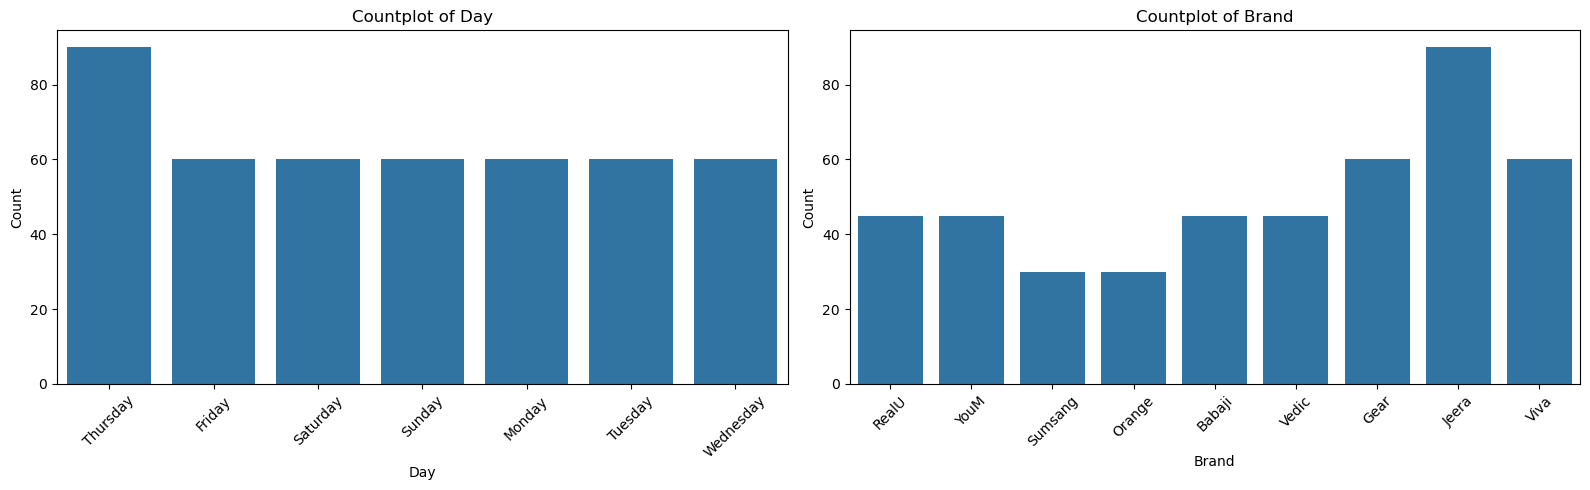

In [18]:
# Insights from Box Plot:
# 1. we detect the outliers
# 2. we get IQR for each numerical feature
# 3. The length of the box (interquartile range, IQR) indicates the spread or variability of the data. 
#    A wider box suggests higher variability, while a narrower box suggests lower variability.
# 4. as we can see each box plot has different central tendency and spread.

categorical_columns = ["Day", "Brand"]
num_cols = len(categorical_columns)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(16, 5))

# Iterate over each categorical column and plot a bar plot
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
#Standardization
numerical_columns = df.select_dtypes(include=['int', 'float'])
nc = pd.DataFrame(numerical_columns)
nc.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770


In [21]:
print(scaler.fit(nc))

StandardScaler()


In [22]:
print(scaler.mean_)

[5.06666667e+00 1.04534333e+04 3.38128356e+04 1.51552419e+01
 3.34649942e+03 3.04663361e+04]


In [23]:
#calculate mean and standard deviation for each numerical column
means =nc.mean()
stds = nc.std()


In [24]:
standardized_df = (nc - mean) / stds
standardized_df.head(5)

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,-7196.171406,-1.015843,2.988690,-7215.719512,-2.064975,2.801638
1,-7197.352992,-1.126463,1.395737,-7215.741860,-4.166438,1.269613
2,-7198.061943,-0.794602,1.627259,-7216.240275,-4.392207,1.543957
3,-7198.298260,-0.573362,1.783586,-7216.837702,-4.900829,1.763847
4,-7199.007212,-1.237083,-0.122021,-7214.217157,-5.785799,-0.227342


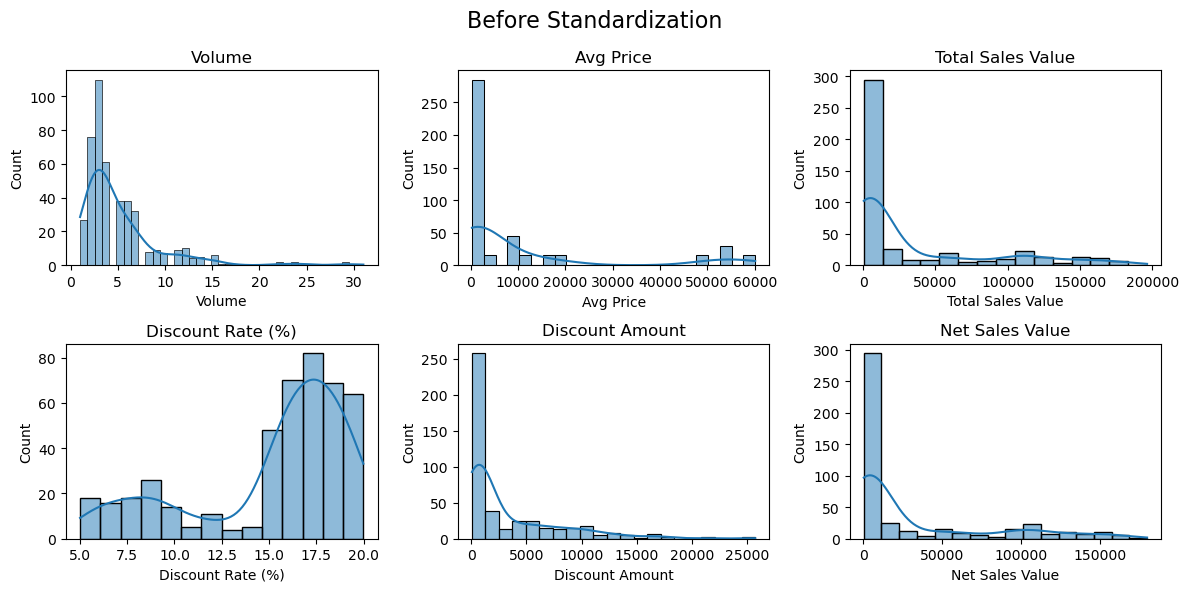

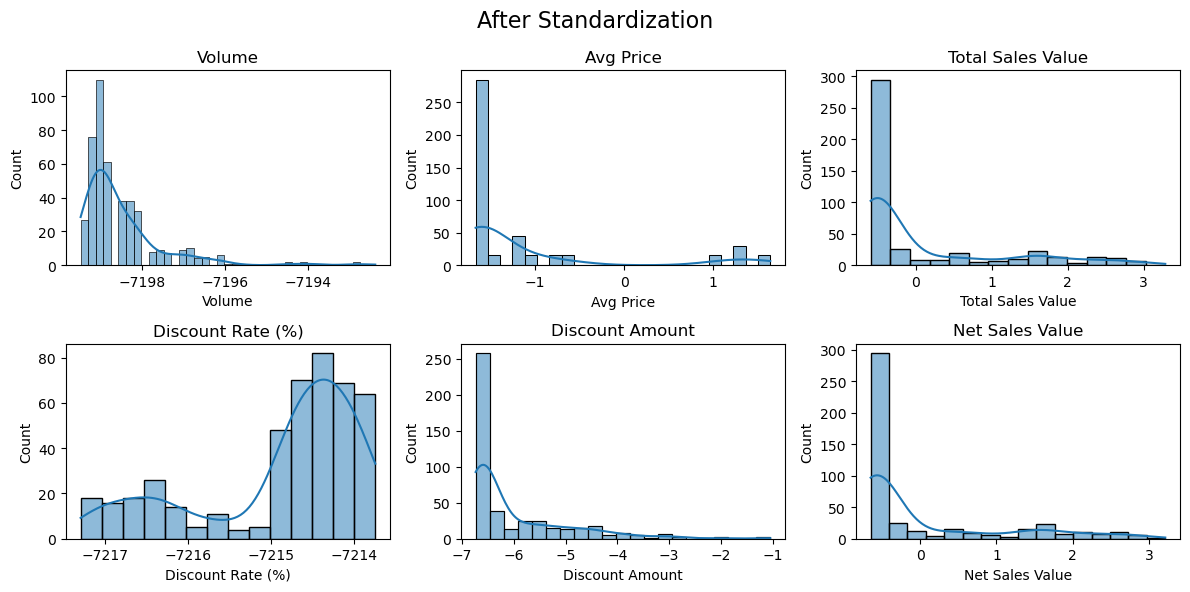

In [25]:
# Plot histograms or density plots before standardization
plt.figure(figsize=(12, 6))
plt.suptitle('Before Standardization', fontsize=16)
for i, column in enumerate(nc.columns):
    plt.subplot(2, len(nc.columns)//2, i+1)
    sns.histplot(nc[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

# Plot histograms or density plots after standardization
plt.figure(figsize=(12, 6))
plt.suptitle('After Standardization', fontsize=16)
for i, column in enumerate(standardized_df.columns):
    plt.subplot(2, len(standardized_df.columns)//2, i+1)
    sns.histplot(standardized_df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()


In [ ]:
#Comparison Insight after and before standardization
#As there are no changes in the data distribution before and after standardization, 
#it typically indicates that the data was already standardized or scaled appropriately. 
#Standardization is most beneficial when the original data has different scales or units, 
#and bringing them to a common scale helps in model training and interpretation.

In [ ]:
#Conversion of Categorical Data into Dummy Variables

#Converting categorical data into dummy variables, also known as one-hot encoding, is necessary for several reasons:

   # Compatibility with Machine Learning Algorithms

   # Preserving Ordinal Relationships

   # Preventing Misinterpretation as Numeric Values

   # Handling Non-Numeric Categories

   # Improving Model Performance

  #  Avoiding Biases

In [36]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
cc = df.select_dtypes(include=['object']).columns.tolist()
print(cc)
['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']
ed=df.drop(["SKU", "BU", "Model", "City"],axis=1)
ed

['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


,Date,Day,Volume,Brand,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,15,RealU,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,10,RealU,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,7,YouM,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,6,YouM,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,3,YouM,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,2,Jeera,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,6,Viva,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,2,Viva,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,3,Jeera,1900,5700,16.793014,957.201826,4742.798174


In [31]:
ed.value_counts('Brand')

Brand
Jeera      90
Gear       60
Viva       60
Babaji     45
RealU      45
Vedic      45
YouM       45
Orange     30
Sumsang    30
Name: count, dtype: int64

In [38]:
ed.value_counts('Day')

Day
Thursday     90
Friday       60
Monday       60
Saturday     60
Sunday       60
Tuesday      60
Wednesday    60
Name: count, dtype: int64

In [37]:
print(ed.columns)

Index(['Date', 'Day', 'Volume', 'Brand', 'Avg Price', 'Total Sales Value',
       'Discount Rate (%)', 'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [41]:
#Fit and transform the data
encoded_columns = encoder.fit_transform(ed[['Day', 'Brand']])


In [43]:
#get column names for encoded column
columns_names = [f'{column} {cat}' for column, cats in zip(['Day', 'Brand'], encoder.categories_) for cat in cats]

In [45]:
#convert to dataframe
encoded_column_df = pd.DataFrame(encoded_columns, columns=columns_names)
print(encoded_column_df)

     Day Friday  Day Monday  Day Saturday  Day Sunday  Day Thursday  \
0           0.0         0.0           0.0         0.0           1.0   
1           0.0         0.0           0.0         0.0           1.0   
2           0.0         0.0           0.0         0.0           1.0   
3           0.0         0.0           0.0         0.0           1.0   
4           0.0         0.0           0.0         0.0           1.0   
..          ...         ...           ...         ...           ...   
445         0.0         0.0           0.0         0.0           1.0   
446         0.0         0.0           0.0         0.0           1.0   
447         0.0         0.0           0.0         0.0           1.0   
448         0.0         0.0           0.0         0.0           1.0   
449         0.0         0.0           0.0         0.0           1.0   

     Day Tuesday  Day Wednesday  Brand Babaji  Brand Gear  Brand Jeera  \
0            0.0            0.0           0.0         0.0          0.0   

In [46]:
encoded_column_df.head()

,Day Friday,Day Monday,Day Saturday,Day Sunday,Day Thursday,Day Tuesday,Day Wednesday,Brand Babaji,Brand Gear,Brand Jeera,Brand Orange,Brand RealU,Brand Sumsang,Brand Vedic,Brand Viva,Brand YouM
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
